# **Arabic POS with NetworkX in Articles**

## **Dataset Selection**

   - #### **Arabic Datasets**

      1. **Arabic Treebank (ATB)**
         - **Description**: The Arabic Treebank is one of the most widely used corpora for Arabic POS tagging, containing syntactically annotated Arabic texts. It includes three parts (ATB1, ATB2, and ATB3) based on texts from newswire sources.
         - **Access**: The Arabic Treebank is available via the LDC (Linguistic Data Consortium). You can access it through a subscription or license.
         - **Link**: [LDC Catalog](https://catalog.ldc.upenn.edu/)
         - **Usage**: After obtaining the dataset, you can use it to tag Arabic articles and then build graphs using NetworkX.

      2. **ArSenL - The Arabic Semantic Lexicon**
         - **Description**: A large-scale Arabic lexicon that can be used for POS tagging. Though its primary purpose is semantic lexicon construction, it contains valuable information for POS tagging and can be combined with other tools for tagging Arabic texts.
         - **Link**: [ArSenL Dataset](https://github.com/nadiNLP/ArSenL)

      3. **CAMeL Tools POS Tagger**
         - **Description**: CAMeL tools is a toolkit for Arabic NLP that includes a POS tagger, lemmatizer, and named entity recognizer. The POS tagger is based on the Arabic Treebank and can be used to label Arabic text with POS tags.
         - **Usage**: You can process Arabic articles, extract POS tags, and build graphs based on sentence structures using NetworkX.

      4. **ArabiCorpus**
         - **Description**: ArabiCorpus is a large collection of Arabic texts from various genres like news, literature, and essays. It can be used as a source of Arabic text for POS tagging, although it doesn't come with tags itself.
         - **Link**: [ArabiCorpus](http://arabicorpus.byu.edu/)
         - **Usage**: You can apply an external POS tagger (like CAMeL Tools or SpaCy with the Arabic language model) to tag these articles and then build graphs using NetworkX.

      5. **Spacy Arabic Model**
         - **Description**: SpaCy now has an Arabic language model for tokenization and POS tagging. You can use this model on any Arabic text corpus, such as the ArabiCorpus.
         - **Usage**: This can be used on any Arabic text dataset for POS tagging.

      6. **Tashkeela Dataset**
         - **Description**: Tashkeela is a dataset focused on diacritized Arabic texts, which can be useful for a range of NLP tasks, including POS tagging. You can combine it with external POS taggers like CAMeL Tools or SpaCy for POS tagging.
         - **Link**: [Tashkeela Dataset](https://www.kaggle.com/obaidellah/tashkeela)
         - **Usage**: Use this dataset for POS tagging and further analysis with NetworkX.

In [99]:
import pyconll
import pandas as pd
import numpy as np
import re
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, TimeDistributed, SimpleRNN
from tensorflow.keras.models import Sequential

## **Data Reading**

In [3]:
data = pyconll.load_from_file('Data/ar_padt-ud-train.conllu')
data_val = pyconll.load_from_file('Data/ar_padt-ud-dev.conllu')

In [4]:
for row in data:
    for values in row:
        print(values.form, values.upos)
        break

برلين X
برلين X
وفي None
وكانت None
واشارت None
وتعذر None
وفي None
مقتل NOUN
لاغوس X
واعلن None
وبدأت None
واستمرت None
ولم None
هذا DET
1945 NUM
1948 NUM
1951 NUM
1955 NUM
1965 NUM
1979 NUM
1985 NUM
1989 NUM
1995 NUM
1995 NUM
1995 NUM
هذا DET
1913 NUM
1918 NUM
1945 NUM
1951 NUM
1958 NUM
1968 NUM
1971 NUM
1973 NUM
1979 NUM
1987 NUM
1998 NUM
1998 NUM
مقتل NOUN
صوفيا X
واوضح None
وتوفي None
وكان None
وكانت None
وقال None
وشارك None
الولايات NOUN
ثورمونت X
وقال None
واضاف None
وقرر None
وكان None
دراسة NOUN
واشنطن X
واوضحت None
وذكر None
ومن None
واخيرا None
العثور NOUN
باين X
وتخشى None
وكان None
وبين None
الجمارك NOUN
صوفيا X
وعثر None
واوضح None
واشار None
ومنذ None
خلاف NOUN
لندن X
واشارت None
ونقلت None
واضاف None
واشارت None
واكدت None
عرفات X
هانوي X
واوضح None
وقد None
وكان None
وقد None
وسبق None
كما CCONJ
ومن None
بدا VERB
سيول X
وكانت None
وقد None
وهذا None
فقد None
اسرائيل X
القدس NOUN
وقالت None
واضافت None
وقال None
وقد None
من ADP
وندد None
دورة NOUN
مونتريال X
وفازت None

In [5]:
def load_data(data):

    dataset = []

    for row in data:

        text = []
        tag = []

        for values in row:
            text.append(values.form)
            tag.append(values.upos)

        dataset.append((text, tag))

    return dataset

In [6]:
df = pd.DataFrame(load_data(data), columns=['sentence', 'tags'])

In [7]:
df.head()

,sentence,tags
0,"[برلين, ترفض, حصول, شركة, اميركية, على, رخصة, ...","[X, VERB, NOUN, NOUN, ADJ, ADP, NOUN, NOUN, NO..."
1,"[برلين, 15, -, 7, (, اف, ب, ), -, افادت, صحيفة...","[X, NUM, PUNCT, NUM, PUNCT, X, X, PUNCT, PUNCT..."
2,"[وفي, و, في, نيسان, /, ابريل, الماضي, ،, تخلت,...","[None, CCONJ, ADP, NOUN, PUNCT, NOUN, ADJ, PUN..."
3,"[وكانت, و, كانت, خسائر, المجموعة, الاسبانية, ا...","[None, CCONJ, VERB, NOUN, NOUN, ADJ, ADJ, VERB..."
4,"[واشارت, و, أشارت, صحيفة, الاحد, الى, ان, المس...","[None, CCONJ, VERB, NOUN, NOUN, ADP, SCONJ, NO..."


In [8]:
df_val = pd.DataFrame(load_data(data_val), columns=['sentence', 'tags'])

In [9]:
df_val.head()

,sentence,tags
0,"[ميراث, ب, 300, الف, دولار, يقلب, حياة, متشرد,...","[NOUN, ADP, NUM, NUM, NOUN, VERB, NOUN, ADJ, ADJ]"
1,"[لونغ, بيتش, (, الولايات, المتحدة, ), 15, -, 7...","[X, X, PUNCT, NOUN, ADJ, PUNCT, NUM, PUNCT, NU..."
2,"[وغادر, و, غادر, كنت, (, 45, عاما, ), مساء, ال...","[None, CCONJ, VERB, X, PUNCT, NUM, NOUN, PUNCT..."
3,"[وبدا, و, بدا, ستيفن, كنت, نحيلا, جدا, ،, الا,...","[None, CCONJ, VERB, X, X, ADJ, NOUN, PUNCT, PA..."
4,"[وبما, و, ب, ما, ان, المناسبة, تستحق, العناء, ...","[None, CCONJ, ADP, DET, SCONJ, NOUN, VERB, NOU..."


## **Preprocessing**

In [100]:
# def preprocessing():
    
#     pattern = re.compile(r'https?://\S+|www\.\S+')
#     text= pattern.sub(' ', text)

#     pattern = re.compile(r'\b[a-zA-Z0-9]+\b|[@#:()%$؟&*\\u"،\\.!_\\n!?؛/-]')
#     text = pattern.sub(' ', text)
    
#     pattern = re.compile(r'\b[a-zA-Z0-9]+\b')
#     text = pattern.sub(' ', text)

#     pattern = re.compile(
#     "["
#     "\U0001F600-\U0001F64F"
#     "\U0001F300-\U0001F5FF"
#     "\U0001F680-\U0001F6FF"
#     "\U0001F700-\U0001F77F"
#     "\U0001F780-\U0001F7FF"
#     "\U0001F800-\U0001F8FF"
#     "\U0001F900-\U0001F9FF" 
#     "\U0001FA00-\U0001FA6F" 
#     "\U0001FA70-\U0001FAFF"
#     "\U00002702-\U000027B0"
#     "\U000024C2-\U0001F251" 
#     "]+", flags=re.UNICODE)

#     text = pattern.sub(' ', text)
#     text = re.sub(r'\s+', ' ', text).strip()

#     return pattern.sub('', text)

## **Data Preparation**

In [67]:
def prepare_data(df):
    # Handle None tags by replacing them with a default tag "O"
    tags = [["O" if tag is None else tag for tag in tag_seq] for tag_seq in df.tags]

    # Build Vocabulary and Tag Set
    words = list(set(word for sentence in df.sentence for word in sentence))
    tags_flat = list(set(tag for tag_seq in tags for tag in tag_seq))  # Flattened list of all unique tags

    # Create Mappings for Words and Tags
    word2idx = {word: idx + 2 for idx, word in enumerate(words)}
    word2idx["PAD"] = 0  # Padding token
    word2idx["UNK"] = 1  # Unknown token

    tag2idx = {tag: idx for idx, tag in enumerate(tags_flat)}
    idx2tag = {idx: tag for tag, idx in tag2idx.items()}

    # Tokenize Sentences and Tags
    X = [[word2idx.get(w, word2idx["UNK"]) for w in s] for s in df.sentence]
    y = [[tag2idx[t] for t in t_seq] for t_seq in tags]

    # Pad Sequences to Max Length (set max_len as appropriate)
    max_len = 100
    X_padded = pad_sequences(X, maxlen=max_len, padding='post', value=word2idx["PAD"])
    y_padded = pad_sequences(y, maxlen=max_len, padding='post', value=tag2idx["O"])  # Using "O" as the default tag for padding

    # One-Hot Encode Labels
    y_one_hot = [to_categorical(i, num_classes=len(tag2idx)) for i in y_padded]

    # Convert to NumPy arrays
    X_padded = np.array(X_padded)
    y_one_hot = np.array(y_one_hot)

    return X_padded, y_one_hot, (word2idx, tag2idx, idx2tag)

In [68]:
X_padded, y_one_hot, (word2idx, tag2idx, idx2tag) = prepare_data(df)

In [12]:
X_padded[0]

array([33104,  8782, 19726, 14144, 23917, 20706, 20580,  5588,  2808,
        1008,  9503,  1008, 17653,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0])

In [13]:
y_one_hot[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

## **RNN**

In [69]:
model = Sequential([
        Embedding(input_dim=len(word2idx) + 1, output_dim=8),
        SimpleRNN(16, return_sequences=True),
        Dense(tag2idx, activation='softmax')
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_20 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_6 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [41]:
history = model.fit(
    X_padded,
    y_one_hot,
    batch_size=32,
    epochs=5
)


Epoch 1/5
190/190 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.4918 - loss: 1.8261
Epoch 2/5
190/190 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7350 - loss: 0.8656
Epoch 3/5
190/190 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8506 - loss: 0.5929
Epoch 4/5
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9028 - loss: 0.4027
Epoch 5/5
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9326 - loss: 0.2771


In [42]:
X_padded_val, y_one_hot_val, _ = prepare_data(df_val)

In [43]:
model.evaluate(X_padded_val, y_one_hot_val)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6992 - loss: 1.1885


[1.218264102935791, 0.6909241676330566]

## **LSTM**

In [79]:
lstm_model = Sequential([
    Embedding(input_dim=len(word2idx), output_dim=100),
    Bidirectional(LSTM(units=64, return_sequences=True)),
    TimeDistributed(Dense(len(tag2idx), activation="softmax"))
])

lstm_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
lstm_model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_23 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_9 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_15             │ ?                      │   0 (unbuilt) │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [80]:
lstm_history = lstm_model.fit(
    X_padded,
    y_one_hot,
    batch_size=32,
    epochs=3
)

Epoch 1/3
190/190 ━━━━━━━━━━━━━━━━━━━━ 48s 206ms/step - accuracy: 0.7040 - loss: 1.0551
Epoch 2/3
190/190 ━━━━━━━━━━━━━━━━━━━━ 37s 195ms/step - accuracy: 0.9549 - loss: 0.1734
Epoch 3/3
190/190 ━━━━━━━━━━━━━━━━━━━━ 45s 234ms/step - accuracy: 0.9869 - loss: 0.0580


In [81]:
lstm_model.evaluate(X_padded_val, y_one_hot_val)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7047 - loss: 1.5690


[1.630396842956543, 0.6955115795135498]

### **Testing**

In [84]:
def preprocess_input_sentence(sentence, max_len):

    sentence_tokenized = [word2idx.get(word, word2idx['UNK']) for word in sentence]
    sentence_padded = pad_sequences([sentence_tokenized], maxlen=max_len, padding='post', value=word2idx["PAD"])
    
    return sentence_padded

def predict_pos_tags(sentence, model, max_len):

    sentence_padded = preprocess_input_sentence(sentence, max_len)

    predictions = lstm_model.predict(sentence_padded)
    predicted_tag_indices = np.argmax(predictions, axis=-1)[0]
    predicted_tags = [idx2tag[idx] for idx in predicted_tag_indices]

    return predicted_tags

In [85]:
sentence = ['برلين', 'ترفض', 'حصول', 'شركة', 'اميركية']
predicted_tags = predict_pos_tags(sentence, model, max_len=100)


for word, tag in zip(sentence, predicted_tags):
    print(f"{word}: {tag}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
برلين: X
ترفض: VERB
حصول: NOUN
شركة: NOUN
اميركية: ADJ


In [98]:
sentence = 'مها تحب القراءة ، و شغوفة ايضا بالقصص البوليسية'.split()
predicted_tags = predict_pos_tags(sentence, model, max_len=100)

output = {}
for word, tag in zip(sentence, predicted_tags):
    output[word] = tag
    print(f"{word}: {tag}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
مها: NOUN
تحب: VERB
القراءة: NOUN
،: PUNCT
و: CCONJ
شغوفة: O
ايضا: ADV
بالقصص: NOUN
البوليسية: NOUN


## **Representation using NetworkX**

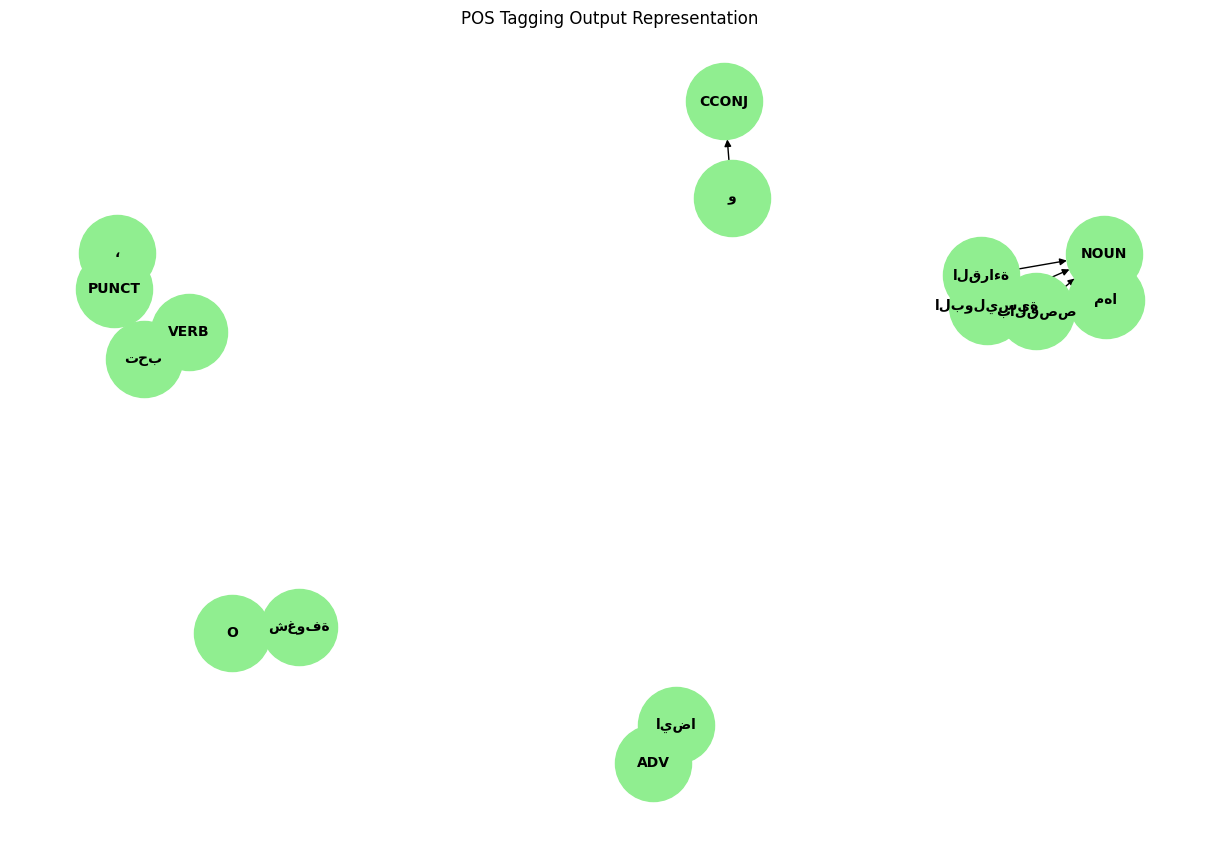

In [97]:
import matplotlib.pyplot as plt
import networkx as nx

# Sample output of the POS tagging model for visualization
pos_output = output

# Create a directed graph for POS tagging output
G_pos = nx.DiGraph()

# Add nodes and edges to represent words and their POS tags
for word, tag in pos_output.items():
    G_pos.add_node(word, label=word)
    G_pos.add_node(tag, label=tag)
    G_pos.add_edge(word, tag)  # Edge from word to its POS tag

# Draw the graph
pos = nx.spring_layout(G_pos)  # Position nodes with a spring layout
labels = {n: G_pos.nodes[n]['label'] for n in G_pos.nodes()}

plt.figure(figsize=(12, 8))
nx.draw(G_pos, pos, with_labels=True, labels=labels, node_color='lightgreen', node_size=3000, font_size=10, font_weight='bold')
plt.title("POS Tagging Output Representation")
plt.show()